Επαναλαμβάνω την ίδια διαδικασία ανάγνωσης του εγγράφου για τον διαχωρισμό των δεδομένων από τις ετικέτες.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

# Πρέπει να αλλάξει ανάλογα με την θέση του αρχείου Data_ex1 στο Google Drive
# Διαφορετικά να βγει από σχόλιο η τελευταία γραμμή του κελιού
path_to_data = '/content/gdrive/MyDrive/Colab Notebooks/Pattern Recognition/HW 03/seeds_dataset.txt'

import numpy as np
global file
file = np.loadtxt(path_to_data, dtype=float, encoding=None, delimiter="\t")

del path_to_data

# Εάν θέλουμε να ανεβάσουμε χειροκίνητα το αρχείο Data_ex1.txt
# file = np.loadtxt('seeds_dataset.txt', dtype=float, encoding=None, delimiter=",")

data   = file[:, :-1]
labels = file[:, -1]
del file

Mounted at /content/gdrive


# **ΕΡΩΤΗΜΑ Α**

**Επιλέξτε έναν αλγόριθμο ιεραρχικής ομαδοποίησης της αρεσκείας σας (agglomerative ή divisive) και εφαρμόστε τον στο ίδιο σύνολο δεδομένων με τα προηγούμενα. Περιγράψτε συνοπτικά την τεχνική που επιλέξατε και τις παραμέτρους που χρησιμοποιήσατε (π.χ. μετρική, linkage method κλπ.). σε μία παράγραφο.**

Ο αλγόριθμος agglomerative ακολουθεί bottom-up προσέγγιση. Κάθε σημείο των δεδομένων θεωρείται ως μία ανεξάρτητη ομάδα και σταδιακά οι κοντινότερες συνενώνονται σε μεγαλύτερες έως ότου επιτευχθεί ο επιθυμητός αριθμός ομάδων. Η απλότητα του και εύκολη υλοποίηση του τον έχει καταστήσει σε έναν από τους δημοφιλούς αλγόριθμους ομαδοποίησης. Σημειώνεται ότι για μεγάλα σύνολα δεδομένων έχει μεγάλο υπολογιστικό κόστος.

Η υλοποίησή γίνεται με την βοήθεια της συνάρτησης AgglomerativeClustering βιβλιοθήκης sklearn. Ως μετρική απόστασης επιλέχθηκε η μέθοδος 'Ward', η οποία είναι αποτελεσματική στον εντοπισμό σφαιρικών συστάδων στοχεύοντας στην ελαχιστοποίηση της συνολικής διακύμανσης εντός των ομάδων κατά την συγχώνευση. Τα στοιχεία κάθε συστάδας είναι όσο το δυνατόν πιο όμοια μεταξύ τους. Η μετρική που ορίζεται αυτόματα για τον υπολογισμό της απόστασης είναι η ευκλείδεια.

In [2]:
from sklearn.cluster import AgglomerativeClustering

agg_cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
agg_cluster.fit(data)

AgglomerativeClustering(n_clusters=3)

# **ΕΡΩΤΗΜΑ Β**

**Κατασκευάστε το δενδρόγραμμα που προέκυψε από την ομαδοποίηση, και σχολιάστε πως σχετίζεται με τις ποικιλίες των σιτηρών (κλάσεις) των αντίστοιχων δεδομένων.**

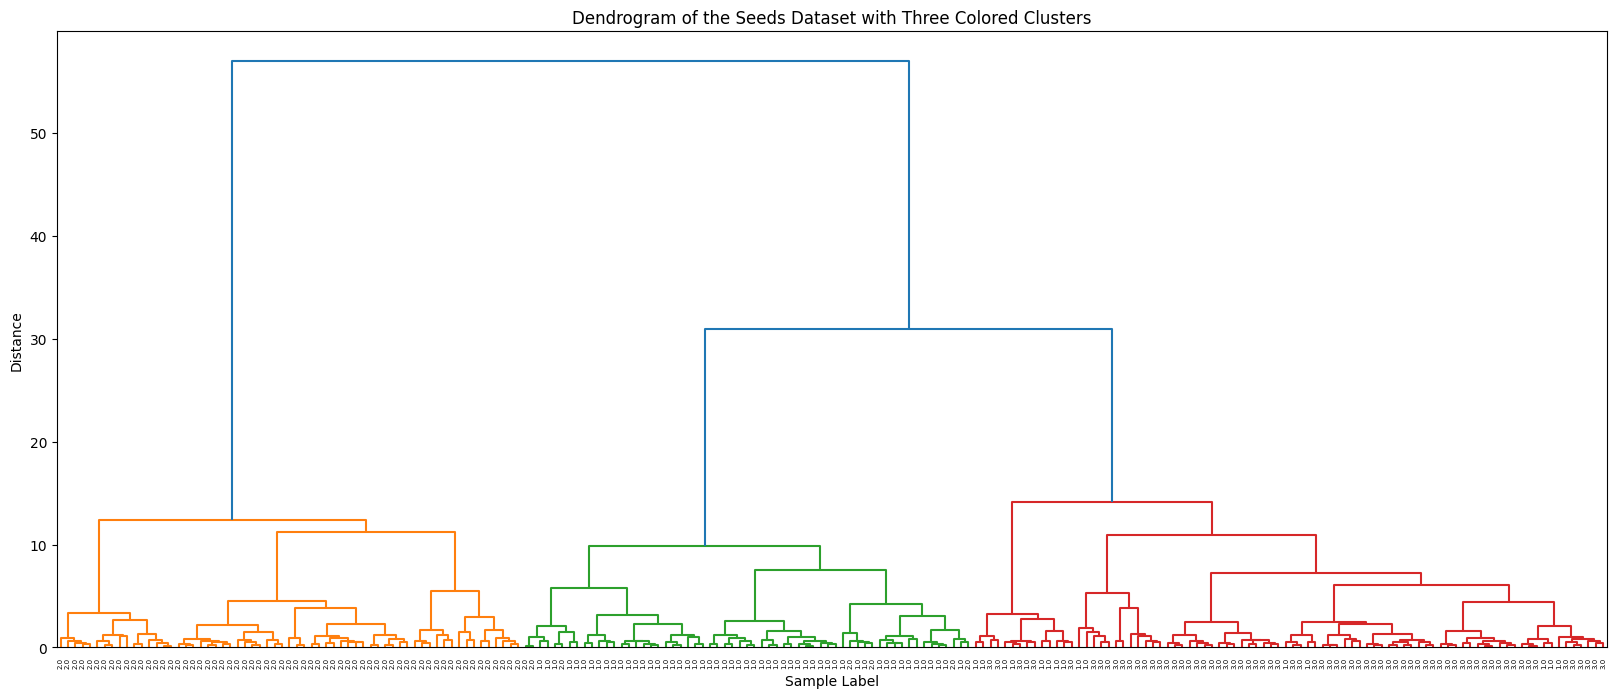

In [3]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

linked = linkage(data, method='ward')

plt.figure(figsize=(20, 8))
dendrogram(linked,
           orientation='top',
           color_threshold=15,
           labels=labels)

plt.title("Dendrogram of the Seeds Dataset with Three Colored Clusters")
plt.xlabel("Sample Label")
plt.ylabel("Distance")
plt.show()

Σύμφωνα και με το δενδροδιάγραμμα της εικόνας 5, εντοπίζονται τρεις διακριτές ομάδες, οι οποίες έχουν χρωματιστεί και με διαφορετικό χρώμα (πορτοκαλί, πράσινο, κόκκινο). Σύμφωνα με τις τιμές του άξονα x παρατηρώ ότι οι τρεις κλάσεις ομαδοποιούνται σε ξεχωριστές ομάδες χωρίς πολλά σφάλματα. Συγκεκριμένα, η πορτοκαλί ομάδα αποτελείται μονάχα από δείγματα της κλάσης 2. Ελάχιστα δείγματα της κλάσης αυτής εντοπίζονται σε άλλες ομάδες. Η πράσινη ομάδα αποτελείται από δείγματα της κλάσης 1 με ελάχιστα δείγματα της κλάσης 2 και κανένα της κλάσης 3. Η κόκκινη ομάδα αποτελείται από δείγματα της κλάσης 3 και ελάχιστα δείγματα της κλάσης 1. Συνεπώς, κάθε μία από τις τρεις ομάδες ενδέχεται να αντιπροσωπεύει μία από τις τρεις διαφορετικές ποικιλίες σιτηρών.

# **ΕΡΩΤΗΜΑ Γ**

**Χρησιμοποιήστε κάποιο κριτήριο εξωτερικής επικύρωσης (π.χ. rand index, adjusted rand index, mutual information κλπ) και συγκρίνετε την ομαδοποίηση αυτή με την αντίστοιχη που επιτυγχάνει ο k-means σε σχέση με τις ετικέτες των δεδομένων. Ποια μετρική επιτυγχάνει ομαδοποίηση πιο πιστή στις πραγματικές ομάδες των δεδομένων;**

In [4]:
from itertools import product
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import adjusted_rand_score

methods = ['single', 'complete', 'average', 'ward', 'centroid']
metrics = ['euclidean', 'cosine']


# Κανονικοποίηση δεδομένων ώστε κάθε χαρακτηριστικό να έχει μηδενική μέση τιμή και μοναδιαία διακύμανση
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=True, with_std=True)
data_normalized = scaler.fit_transform(data)
length = np.sqrt((data_normalized**2).sum(axis=1))[:, None]
data_cosine = data_normalized / length


ari_scores = {}

print(" Method\t\t  Metric\t\tARI")
for metric, method  in product(metrics, methods):
    if metric == 'euclidean':
        DATA = data
    else:
        DATA = data_cosine

    # DATA = data_normalized

    # οι μέθοδοι 'ward' & 'centroid' λειτουργούν μόνο με 'euclidean'
    if (method == 'ward' or method == 'centroid') and metric != 'euclidean':
        continue

    a = linkage(DATA, method=method, metric=metric)
    labels_pred = fcluster(a, t=3, criterion='maxclust')

    ari = adjusted_rand_score(labels, labels_pred)
    ari_scores[(method, metric)] = ari

    if method != 'ward' and method != 'single':
      print(method, "\t", metric,"\t", ari)
    else:
      print(method, "\t\t", metric,"\t", ari)

 Method		  Metric		ARI
single 		 euclidean 	 0.0024703116164171554
complete 	 euclidean 	 0.546135027762822
average 	 euclidean 	 0.7441752360248661
ward 		 euclidean 	 0.7131537289031059
centroid 	 euclidean 	 0.5664395805591734
single 		 cosine 	 9.202374344043254e-05
complete 	 cosine 	 0.7108638571583838
average 	 cosine 	 0.7889212187703276


In [5]:
# Εύρεση του συνδυασμού με την μέγιστη τιμή ARI
max_ari = max(ari_scores, key=ari_scores.get)
max_ari_method, max_ari_metric = max_ari
max_ari_value = ari_scores[max_ari]

print("Η μέγιστη τιμή του δείκτη ARI είναι ", max_ari_value, " και προκύπτει για μέθοδο ", max_ari_method, " με μετρική απόστασης ", max_ari_metric)

Η μέγιστη τιμή του δείκτη ARI είναι  0.7889212187703276  και προκύπτει για μέθοδο  average  με μετρική απόστασης  cosine
